In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from google.colab import drive 
drive.mount("/content/drive/")

import os
os.chdir("/content/drive/My Drive/DSECOP/Colab Notebooks/")
!pwd

Mounted at /content/drive/
/content/drive/My Drive/DSECOP/Colab Notebooks


# Conceptual questions

## Choosing a histogram binning scheme


In going through the example modules, you might have wondered how to choose the number of bins for a given histogram. Certainly one bin is too few, as it would produce a histogram with no internal structure. On the other hand, assinging every data point to its own histogram would result in too many bins, and would in fact not represent any data processing at all. But between those two extremes, it might not be obvious where the optimal binning scheme lies, or if an optimal exists at all.

How does choice of binning affect what you learn from a histogram? A dataset is provided for you in the file ```quiz_dataset.txt``` to explore this question.

*Note*: This question is fairly open-ended. Focus more on giving an answer that you are personally satisfied with, rather than the "right" answer. 

*Write your thoughts here:*

In [ ]:
# Write some code here:

def gaussian(x, mu, sigma, N):
  return N*np.exp(-(x-mu)**2/(2*sigma**2))

def exp(x, alpha, M):
  return M*np.exp(-x*alpha)

def fit(x, mu, sigma, N, alpha, M):
  return gaussian(x, mu, sigma, N) + exp(x, alpha, M)

def least_sq_loss(obs_vals, fit_vals):
  loss = 0
  for i in range(len(obs_vals)):
    loss += (obs_vals[i] - fit_vals[i])**2
  return loss / len(obs_vals)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys


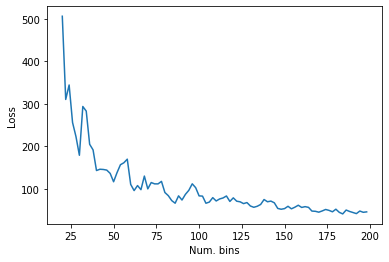

In [ ]:
def fit_dataset(dataset, num_bins):

    bins = np.linspace(0,30,num_bins)
    centers = 0.5*(bins[1:] + bins[:-1])
    vals, bins = np.histogram(dataset, bins)

    popt, pcov = curve_fit(fit, centers, vals)

    loss = least_sq_loss(vals, fit(centers, *popt))

    return num_bins, loss


dataset_location = "datasets/quiz_dataset.txt"

def read_in_dataset(file_loc):

  with open(file_loc, "r") as infile:
    dataset = infile.read().split(",")
    dataset = np.array([float(x) for x in dataset if x != " "])

    return dataset

dataset = read_in_dataset(dataset_location)

num_bins_vals = []
loss_vals = []

for num_bins in range(20,200,2):
  loc_bins, loc_loss = fit_dataset(dataset, num_bins)
  num_bins_vals.append(loc_bins)
  loss_vals.append(loc_loss)

plt.figure()
plt.plot(num_bins_vals, loss_vals)
plt.xlabel("Num. bins")
plt.ylabel("Loss")
plt.show()
 

## $\chi^2$ test subtleties



Captived by your earlier counting experiments, your friends Alice and Bob managed to swipe your Uranium-241 sample to do some testing of their own. In an attempt to measure the decay rate of the same, Alice and Bob record the counts per minute from the sample for 4 hours. They then decide to run a $\chi^2$ goodness-of-fit test to see if their measured decay rate is consistent with the listed value on in the [Particle Data Group tables](https://pdg.lbl.gov/).


Alice: "We should calculate the $\chi^2$ test statistic with the observed and expected values also in counts, right after we histogram the data."

Bob: "I don't agree. We should histogram the data, then normalize the histograms and use the rescaled counts to calculate the $\chi^2$ statistic."

Alice: "But the data that we took was in units of counts. Shouldn't we keep those units for the $\chi^2$ test?"

Bob: "No way! If we took data for 2 hours, we would have twice as many counts per histogram bin. But the overall shape would still obey the same distribution. The $\chi^2$ test statistic shouldn't change depending on how long we take data for."

Is Bob right? Justify your answer below.


*Write your thoughts here:*

## The language of hypothesis testing



Alice and Bob come to some consensus on how to best calculate the $\chi^2$ test statistic. They then move to the task of evaluating how well their data is described by the null hypothesis. (In this case, the null hypothesis is Uranium-241 has a decay rate of 19 counts / minute.)

Alice: "The value of $\chi^2$ that we measured is greater than the value of $\chi^2_{\alpha}$ from the lookup table, even for $\alpha$ = 0.01. This means that the null hypothesis is false."

Bob: "Great, so that means that the alternative hypothesis is true."

Why are they *both* wrong?

*Write your thoughts here:*

## The bin-wise behavior of residuals




Alice decides to make a residual plot for her histogram of Uranium-241 counts per minute data. Alice fits her histogram to a given distribution, evaluates her residuals plot, and concludes:

Alice: "Half of my residuals are positive and half are negative. Therefore my fit function is a good one for my observed data."

Under what circumstances could Alice have made a half-positive half-negative residuals plot with a model function that is a poor fit to the data? It might help to draw some scenerios out.


*Write your thoughts here:*